### Miscellaneous Classification Topics

## This Section we will cover
---
Miscellaneous Classification Topics
- Linear Discriminant Analysis Classification
- Naive Bayes Classification
- Precision/Recall
- f-Score
- Multiple Classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from scipy.stats import norm
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Example Problem 1
---
This is the synthetic example problem

In [2]:
# ensure repeatability of this notebook 
# (comment out for new results each run)
np.random.seed(12345)

# Get some normally distributed samples
def sample_cluster(n, x, y, sigma):
    x = np.random.randn(n) * sigma + x;
    y = np.random.randn(n) * sigma + y;
    return np.array([x, y]).T

c1 = sample_cluster(50, 1, 0, 0.5)
c2 = sample_cluster(50, 0, 1, 0.4)
d1 = DataFrame(c1, columns=['x','y'])
d2 = DataFrame(c2, columns=['x','y'])
d1['class'] = 'a'
d2['class'] = 'b'
data1 = d1.append(d2)
data1.index = pd.RangeIndex(100)

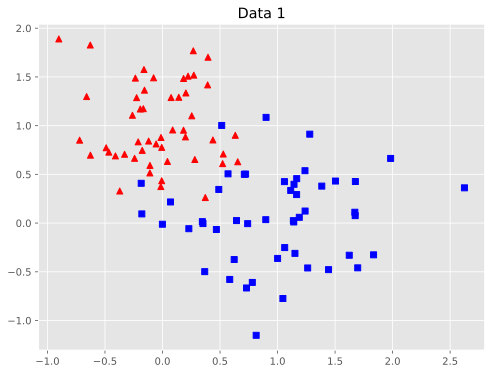

In [3]:
plt.figure(figsize=(8,6))
plt.plot(c1[:,0], c1[:,1], 'bs', label='a')
plt.plot(c2[:,0], c2[:,1], 'r^', label='b')
plt.title('Data 1')
plt.show()

## Example Problem 2
---
This is the synthetic example problem

In [4]:
def f(X):
    return 3 + 0.5 * X - X**2 + 0.15 * X**3

# convenience function for generating samples
def sample(n, fn, limits, sigma):
    width = limits[1] - limits[0]
    height = limits[3] - limits[2]
    x = np.random.random(n) * width + limits[0]
    y = np.random.random(n) * height + limits[2]
    s = y > fn(x)
    p = norm.cdf(np.abs(y - fn(x)), scale = sigma)
    r = np.random.random(n)
    
    def assign(sign, prob, rnum):
        if sign:
            if rnum > prob:
                return 'b'
            else:
                return 'a'
        else:
            if rnum > prob:
                return 'a'
            else:
                return 'b'
        
    c = [assign(s[i], p[i], r[i]) for i in range(n)]
    
    return DataFrame({'x' : x, 'y' : y, 'class' : c})
    

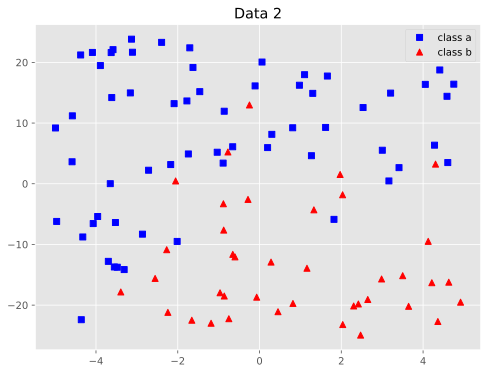

In [5]:
data2 = sample(200, f, [-5, 5, -25, 25], 5)
train, test = train_test_split(data2, test_size = 0.5)
traina = train[train['class']=='a']
trainb = train[train['class']=='b']
plt.figure(figsize=(8,6))
plt.plot(traina['x'], traina['y'],'bs', label='class a')
plt.plot(trainb['x'], trainb['y'],'r^', label='class b')
plt.legend()
plt.title('Data 2')
plt.show()

## Plotting Functions
---

In [6]:
def plot_predicted_1(model, data):
    predicted = model.predict(data[['x','y']])
    correct = data[data['class'] == predicted]
    correcta = correct[correct['class'] == 'a']
    correctb = correct[correct['class'] == 'b']
    incorrect = data[data['class'] != predicted]
    incorrecta = incorrect[incorrect['class'] == 'b']
    incorrectb = incorrect[incorrect['class'] == 'a']
    
    plt.plot(correcta['x'], correcta['y'], 'bs', label='a')
    plt.plot(correctb['x'], correctb['y'], 'r^', label='b')
    plt.plot(incorrecta['x'], incorrecta['y'], 'bs', markerfacecolor='w', label='a (misclassified)')
    plt.plot(incorrectb['x'], incorrectb['y'], 'r^', markerfacecolor='w', label='b (misclassified)')
    plt.legend(loc='upper left', ncol=2, framealpha=1)

In [7]:
def plot_predicted_2(model, data):
    cmap = ListedColormap(['#8888FF','#FF8888'])
    xmin, xmax, ymin, ymax = data['x'].min(), data['x'].max(), data['y'].min(), data['y'].max()
    x_grid_size = (xmax - xmin) / 50
    y_grid_size = (ymax - ymin) / 50
    xx, yy = np.meshgrid(np.arange(xmin, xmax + x_grid_size, x_grid_size), 
                         np.arange(ymin, ymax + y_grid_size, y_grid_size))
    pp = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.array([{'a':0,'b':1}[ab] for ab in pp]) 
    zz = zz.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plot_predicted_1(model, data)

In [8]:
def plot_probabilities(model, data):
    cmap = 'RdBu'
    xmin, xmax, ymin, ymax = data['x'].min(), data['x'].max(), data['y'].min(), data['y'].max()
    x_grid_size = (xmax - xmin) / 50
    y_grid_size = (ymax - ymin) / 50
    xx, yy = np.meshgrid(np.arange(xmin, xmax + x_grid_size, x_grid_size), 
                         np.arange(ymin, ymax + y_grid_size, y_grid_size))
    pp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    zz = pp.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plt.colorbar()
    plot_predicted_1(model, data)

## Bayes' Theorem
---
You may have learned this in a prob/stats course.

It is an insanely elegant and powerful way to incorporate prior knowledge into a probability calculation, among other applications.

There are various ways to state the theorem.  The simplest is

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$P(A)$ is the probability of observing event A.

$P(A|B)$ is the *conditional* probability of $A$ *given* $B$, that is the probability of event A given that B is true.

The theorem is easily derived from the definition of conditional probability.

Alas, all things Bayesian is not the subject of this course; you might try [Wikipedia](https://en.wikipedia.org/wiki/Bayes%27_theorem) for more info.

A classic example of how Bayes' theorem improves on intuition:

Suppose 1% of the population has a certain disease, for which there is a diagnostic test.  A person with the disease has a 90% chance of getting a positive result on the test, while a person without the disease has a 10% chance of getting a false positive.

What is the probability that a person has the disease *given that they just had a positive result on the test*?



Translating, the question asks what the *conditional probability* is of having the disease given a positive result on the test.  We can plug this in;  using D to represent the event of having the disease, and T to represent the positive test event:

$$ P(D|T) = \frac{P(T|D) \times P(D)}{P(T)} $$

The bottom number was not given to us directly, but is easily computed using standard probability rules:

$$ P(D|T) = \frac{P(T|D) \times P(D)}{P(T|D) \times P(D) + P(T|\neg D) \times P(\neg D)} $$


$$ = \frac{0.9 \times 0.01}{0.9 \times 0.01 + 0.1 \times 0.99} $$

$$ = 0.083 $$

The lingo:
$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

We call $P(A|B)$ the *posterior* probability of event $A$, while $P(A)$ is the *prior* probability; that is, our general knowledge or belief about $A$ before observing event $B$.  $B$ is sometimes called *the evidence*.

## Linear Discriminant Analysis
---
Prediction using Bayes' theorem:

- Model *prior* class probability using frequencies
- Model class probability density function as Gaussians using mean, covariance of training data
- Use Bayes' theorem to compute conditional probability of test point class given its features

Advantages: fast, more stable than logistic regression.  A good match when data is normally distributed within classes, as long as covariance among features is the same between classes.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(data1[['x','y']], data1['class'])

LinearDiscriminantAnalysis()

<ipython-input-7-1213062d8ac1>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


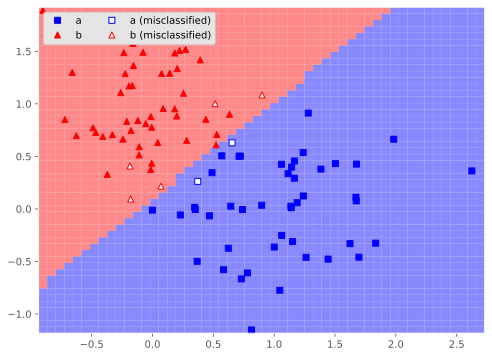

In [10]:
plot_predicted_2(ldamodel, data1)

<ipython-input-8-7f03e37f7e46>:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)
<ipython-input-8-7f03e37f7e46>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


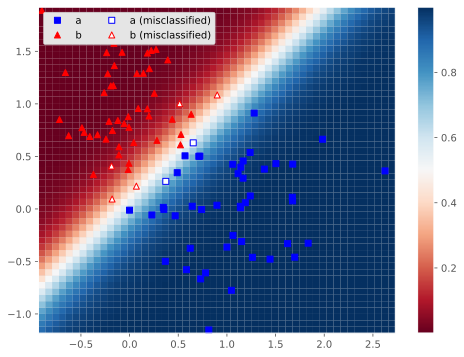

In [11]:
plot_probabilities(ldamodel, data1)

### Naive Bayes
---
Uses Bayes' theorem extended for many observations: $$ P(C|x_1, x_2, \dots) = \frac{P(x_1, x_2, \dots|A) P(A)}{P(x_1, x_2, \dots)} $$

Makes the assumption that all of the observed features are independent - not generally true!
$$ P(C|x_1, x_2, \dots) = \frac{P(x_1|A) P(x_2|A) \dots P(A)}{P(x_1, x_2, \dots)} $$

Finally, since denominator is fixed, Naive Bayes ignores it and just uses the numerator.

Naive Bayes comes in several flavors.

In its binomial distribution flavor, it has been very successfully used for spam classification.

It also has multinomial and Gaussian flavors.

Not always as accurate as other classifiers, but *blazingly fast* even with large numbers of features (due to independence assumption).

In [12]:
from sklearn.naive_bayes import GaussianNB

nbmodel = GaussianNB()
nbmodel.fit(data1[['x','y']], data1['class'])

GaussianNB()

<ipython-input-7-1213062d8ac1>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


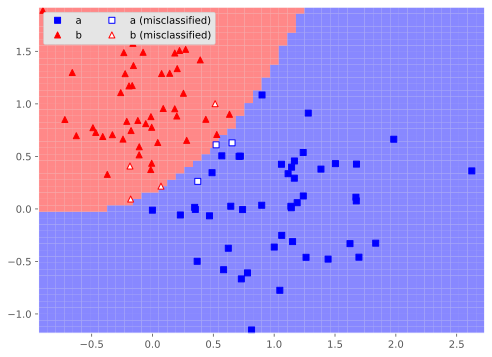

In [13]:
plot_predicted_2(nbmodel, data1)
plt.show()

<ipython-input-8-7f03e37f7e46>:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)
<ipython-input-8-7f03e37f7e46>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


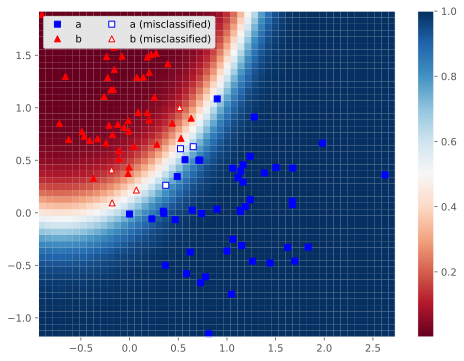

In [14]:
plot_probabilities(nbmodel, data1)
plt.show()

<ipython-input-7-1213062d8ac1>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


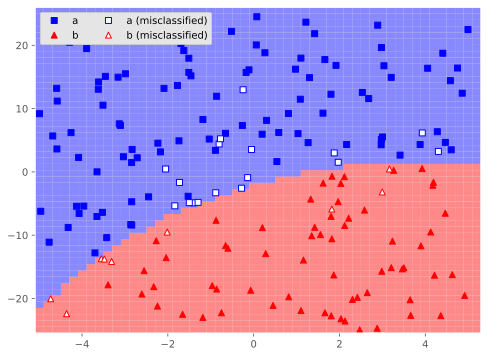

In [15]:
nbmodel.fit(data2[['x','y']], data2['class'])
plot_predicted_2(nbmodel, data2)

<ipython-input-8-7f03e37f7e46>:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)
<ipython-input-8-7f03e37f7e46>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


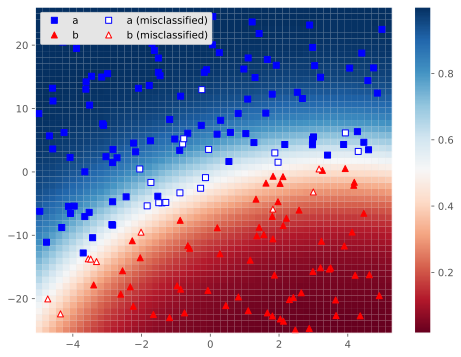

In [16]:
plot_probabilities(nbmodel, data2)

## Other Classifiers
---
We'll study decision trees and ensembles of decision trees in a future lecture.

There are others... neural networks being a significant one.  We may explore these in a future lecture.

## Evaluation Metrics for Classification
---
For *binary* classification tasks, we often consider one class *positive*, the other *negative*.

The normal `score` method of the classifiers in scikit-learn just measures overall accuracy, without distinguishing between classes.

We may want to distinguish between false positives and false negatives, for instance.

E.g., "Do I have cancer?"
 
- false positive leads to additional testing
- false negative leads to not being treated

We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called classification accuracy.


Accuracy -- it is not a great metric for classification when dataset is imbalanced. Not suitable for imbalanced dataset.
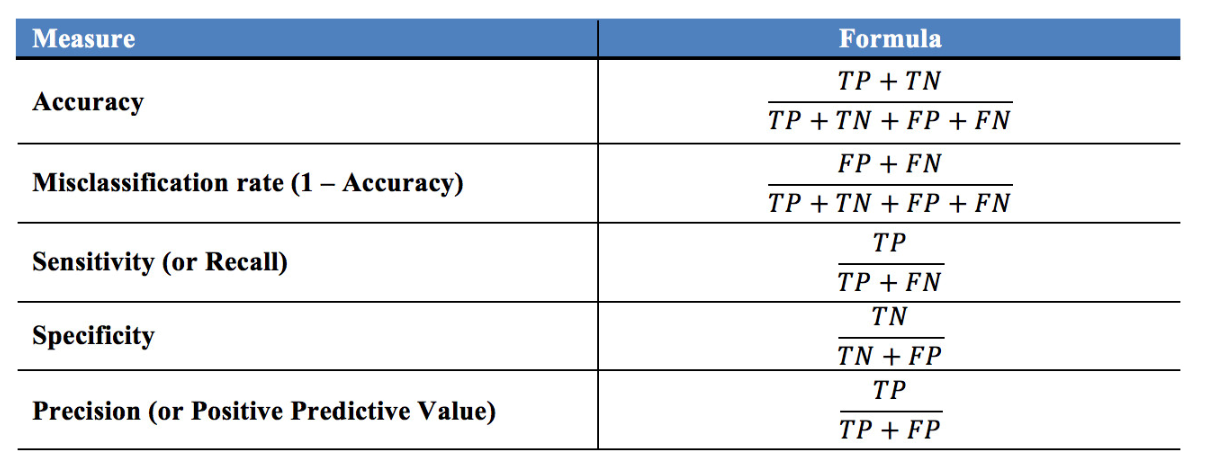

For classification, there are better metrics -- balanced accuracy, confusion matrix, F1, AUC, Recall etc.

There is also a convenience function , score, that all scikit-learn classifiers have to compute this directly from the test data.

### Confusion matrices:

| | |
| ---------- | ---------- |
| true negative | false positive |
| false negative | true positive |

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data1['class'], ldamodel.predict(data1[['x','y']]))

array([[45,  5],
       [ 2, 48]], dtype=int64)

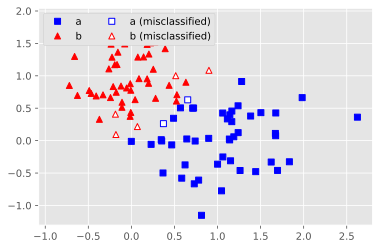

In [18]:
plot_predicted_1(ldamodel, data1)

In [19]:
confusion_matrix(data1['class'], ldamodel.predict(data1[['x','y']]))

array([[45,  5],
       [ 2, 48]], dtype=int64)

| | |
| --- | --- |
| true blue | false red |
| false blue | true red |

### Precision, Recall, and f-score

Precision: percentage of predicted positive are actually positive, e.g.

$$ Precision = \frac{true~ positives}{true ~positives + false ~positives} $$

High precision -> low false positive rate.

Recall: percentage of actual positives are predicted positive, e.g.

$$ Precision = \frac{true~ positives}{true ~positives + false ~negatives} $$

High recall -> low false negative rate.

f-score or f-measure: harmonic mean of precision and recall

$$ F = 2 \times \frac{precision \times recall}{precision + recall} $$

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("LDA Precision:", precision_score(data1['class'], 
                                        ldamodel.predict(data1[['x','y']]),
                                        pos_label='b'))
print("LDA Recall:", recall_score(data1['class'], 
                                        ldamodel.predict(data1[['x','y']]),
                                        pos_label='b'))
      
print("LDA f1-score:", f1_score(data1['class'], 
                                ldamodel.predict(data1[['x','y']]),
                                pos_label='b'))


LDA Precision: 0.9056603773584906
LDA Recall: 0.96
LDA f1-score: 0.9320388349514563


In [21]:
nbmodel.fit(data1[['x','y']], data1['class'])
print("NB Precision:", precision_score(data1['class'], 
                                        nbmodel.predict(data1[['x','y']]),
                                        pos_label='b'))
print("NB Recall:", recall_score(data1['class'], 
                                        nbmodel.predict(data1[['x','y']]),
                                        pos_label='b'))
      
print("NB f1-score:", f1_score(data1['class'], 
                                nbmodel.predict(data1[['x','y']]),
                                pos_label='b'))

NB Precision: 0.9215686274509803
NB Recall: 0.94
NB f1-score: 0.9306930693069307


## Precision-recall Curves and Other Measures
---
- Plot precision versus recall for different decision thresholds
- Many others available, such as ROC, AUC


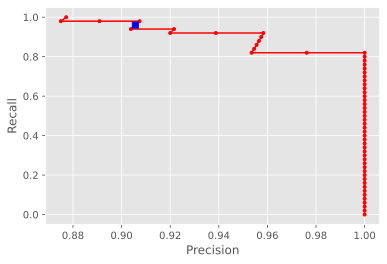

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    data1['class'],
    ldamodel.decision_function(data1[['x','y']]),
    pos_label='b')

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision, recall, 'r.-')
plt.plot(precision[close_zero], recall[close_zero], 'bs')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

## Multiclass Classification
---

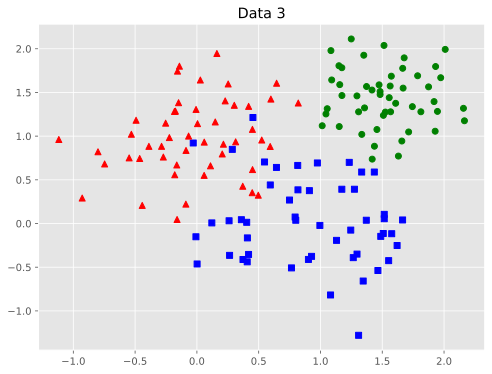

In [23]:
c1 = sample_cluster(50, 1, 0, 0.5)
c2 = sample_cluster(50, 0, 1, 0.4)
c3 = sample_cluster(50, 1.5, 1.5, 0.3)
d1 = DataFrame(c1, columns=['x','y'])
d2 = DataFrame(c2, columns=['x','y'])
d3 = DataFrame(c3, columns=['x','y'])
d1['class'] = 'a'
d2['class'] = 'b'
d3['class'] = 'c'
data3 = d1.append(d2).append(d3)
data3.index = pd.RangeIndex(150)

plt.figure(figsize=(8,6))
plt.plot(c1[:,0], c1[:,1], 'bs', label='a')
plt.plot(c2[:,0], c2[:,1], 'r^', label='b')
plt.plot(c3[:,0], c3[:,1], 'go', label='c')
plt.title('Data 3')
plt.show()

In [24]:
def plot_predicted_3class(model, data):
    cmap = ListedColormap(['#8888FF','#FF8888', '#88FF88'])
    xmin, xmax, ymin, ymax = data['x'].min(), data['x'].max(), data['y'].min(), data['y'].max()
    x_grid_size = (xmax - xmin) / 50
    y_grid_size = (ymax - ymin) / 50
    xx, yy = np.meshgrid(np.arange(xmin, xmax + x_grid_size, x_grid_size), 
                         np.arange(ymin, ymax + y_grid_size, y_grid_size))
    pp = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.array([{'a':0,'b':1,'c':2}[abc] for abc in pp]) 
    zz = zz.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, zz, cmap = cmap)

    predicted = model.predict(data[['x','y']])
    
    correct = data[data['class'] == predicted]
    correcta = correct[correct['class'] == 'a']
    correctb = correct[correct['class'] == 'b']
    correctc = correct[correct['class'] == 'c']
    incorrect = data[data['class'] != predicted]
    incorrecta = incorrect[incorrect['class'] == 'a']
    incorrectb = incorrect[incorrect['class'] == 'b']
    incorrectc = incorrect[incorrect['class'] == 'c']
    
    plt.plot(correcta['x'], correcta['y'], 'bs', label='a')
    plt.plot(correctb['x'], correctb['y'], 'r^', label='b')
    plt.plot(correctc['x'], correctc['y'], 'go', label='c')
    plt.plot(incorrecta['x'], incorrecta['y'], 'bs', markerfacecolor='w', label='a (misclassified)')
    plt.plot(incorrectb['x'], incorrectb['y'], 'r^', markerfacecolor='w', label='b (misclassified)')
    plt.plot(incorrectc['x'], incorrectc['y'], 'go', markerfacecolor='w', label='c (misclassified)')
    plt.legend(loc='upper left', ncol=2, framealpha=1)

<ipython-input-24-53a26de93c99>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


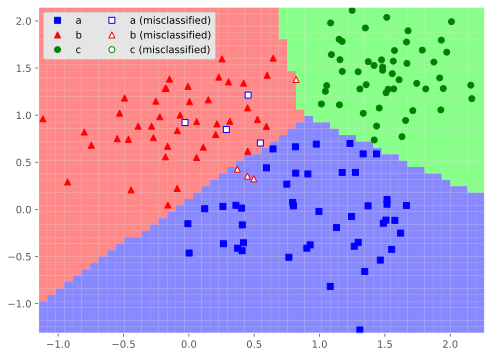

In [25]:
from sklearn.svm import SVC

svc3 = SVC(kernel='linear')
svc3.fit(data3[['x','y']], data3['class'])
plot_predicted_3class(svc3, data3)

<ipython-input-24-53a26de93c99>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


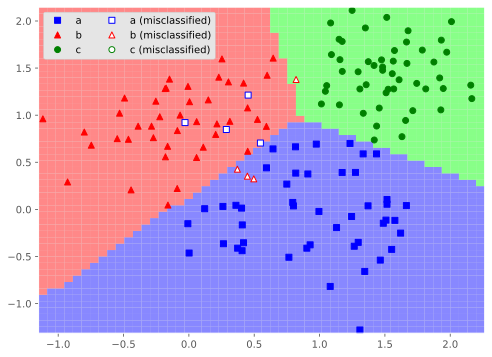

In [26]:
from sklearn.linear_model import LogisticRegression

log3 = LogisticRegression()
log3.fit(data3[['x','y']], data3['class'])
plot_predicted_3class(log3, data3)

<ipython-input-24-53a26de93c99>:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, zz, cmap = cmap)


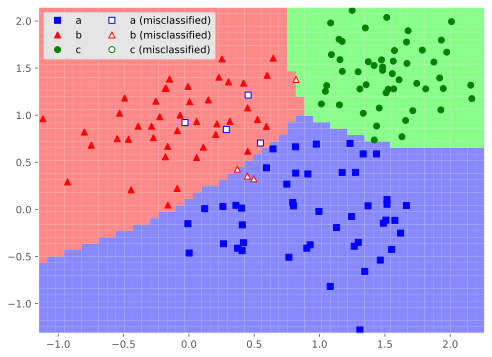

In [27]:
nb3 = GaussianNB()
nb3.fit(data3[['x','y']], data3['class'])
plot_predicted_3class(nb3, data3)